Reuters data 3.5

In [10]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

print(len(train_data))
print(len(test_data))

8982
2246


In [13]:
print('first of train data:')
print(train_data[0])
print('each represents the word that corresponds to its freq in the dataset')

first of train data:
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
each represents the word that corresponds to its freq in the dataset


In [18]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [22]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train)
print(x_train[0])

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[0. 1. 1. ... 0. 0. 0.]


To vectorize the labels, there are two possibilities: you can cast the label list as an inte- ger tensor, or you can use one-hot encoding. One-hot encoding is a widely used for- mat for categorical data, also called categorical encoding. 

In [ ]:
# builtin
# from keras.utils.np_utils import to_categorical
#        one_hot_train_labels = to_categorical(train_labels)
#        one_hot_test_labels = to_categorical(test_labels)


In [34]:
#traditional one hot for labels

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
print(train_labels)
print('one hotted for the first two -- notice how the 3 index is a 1 and the fourth index of the second label is 1:')
print(one_hot_train_labels[0][:10])
print(one_hot_train_labels[1][:10])

[ 3  4  3 ... 25  3 25]
one hotted for the first two -- notice how the 3 index is a 1 and the fourth index of the second label is 1:
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [35]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


## You end the network with a Dense layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
### The last layer uses a softmax activation. You saw this pattern in the MNIST example. It means the network will output a probability distribution over the 46 different output classes—for every input sample, the network will produce a 46- dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.


In [36]:
#best loss function to use in this case is categorical_crossentropy. 
# It measures the distance between two probability distributions
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 114ms/step - loss: 2.6541 - accuracy: 0.5190 - val_loss: 1.7956 - val_accuracy: 0.6280
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4549 - accuracy: 0.6986 - val_loss: 1.3470 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0986 - accuracy: 0.7674 - val_loss: 1.1839 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 1s 89ms/step - loss: 0.8742 - accuracy: 0.8131 - val_loss: 1.0778 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 1s 85ms/step - loss: 0.7066 - accuracy: 0.8504 - val_loss: 1.0033 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 1s 66ms/step - loss: 0.5733 - accuracy: 0.8768 - val_loss: 1.0112 - val_accuracy: 0.7770
Epoch 7/20
16/16 [==============================] - 1s 67ms/step - loss: 0.4639 - accuracy: 0.9023 - val_loss: 0.9136 - val_accuracy: 0.8170
Epoch 8/20
1

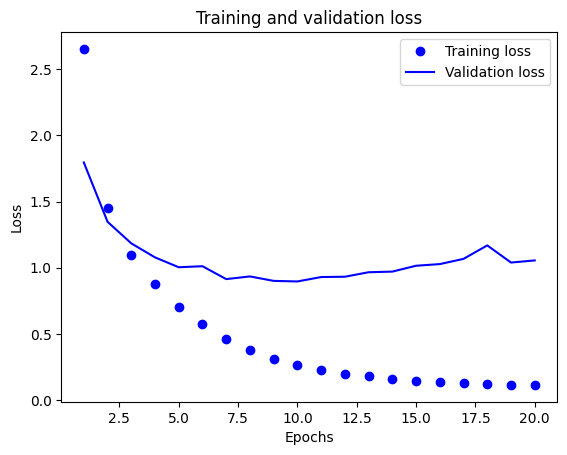

In [37]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


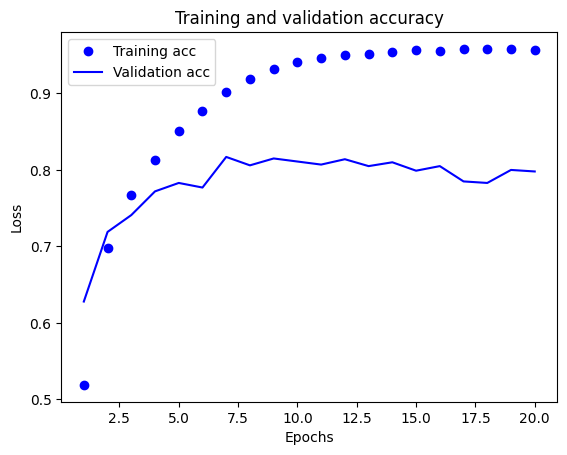

In [40]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [54]:
print(predictions.shape)
print(predictions[0].shape)
print(np.sum(predictions[0])) #coefficients sum to 1
print(np.argmax(predictions[0])) #class with the highest probability


(2246, 46)
(46,)
1.0000001
3


We mentioned earlier that another way to encode the labels would be to cast them as an integer tensor, like this:
     
     y_train = np.array(train_labels)
     y_test = np.array(test_labels)
     
     
The only thing this approach would change is the choice of the loss function. The loss function used in listing 3.21, categorical_crossentropy, expects the labels to follow a categorical encoding. With integer labels, you should use sparse_categorical_ crossentropy:
        
        model.compile(optimizer='rmsprop',
                      loss='sparse_categorical_crossentropy',
                        metrics=['acc'])

This new loss function is still mathematically the same as categorical_crossentropy;
it just has a different interface.